# Análisis exploratorio (EDA)
___

A continuación llevaremos a cabo el análisis exploratorio de la información relacionada a el conjunto de datos ***Hear_Failure_Analysis***, el cual como se menciono anteriormente contiene los datos relacionados a la probabilidad de que un paciente presente una enfermedad cardíaca o no.

## Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\CURSOS\Universidad Nacional\modulo 6\entregas proyecto\Heart_Failure_Analysis\data\heart.csv")

## Compresión y calidad de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
duplicados = df.duplicated().sum()
faltantes = df.isnull().sum()
print(f" Cantidad de datos duplicados: {duplicados}\n Cantidad de datos faltantes: \n{faltantes}")


 Cantidad de datos duplicados: 0
 Cantidad de datos faltantes: 
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Como se evidenció anteriormente, nuestro conjunto de datos está conformado por 918 observaciones que no presentan valores faltantes ni registros duplicados. Asimismo, los tipos de datos asignados a cada variable corresponden de manera adecuada con la naturaleza de la información que representan

In [6]:
numericos = df.select_dtypes(include="number")
categoricos = df.select_dtypes(include="object")

In [7]:
numericos.describe().round(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


## Análisis variables numéricas

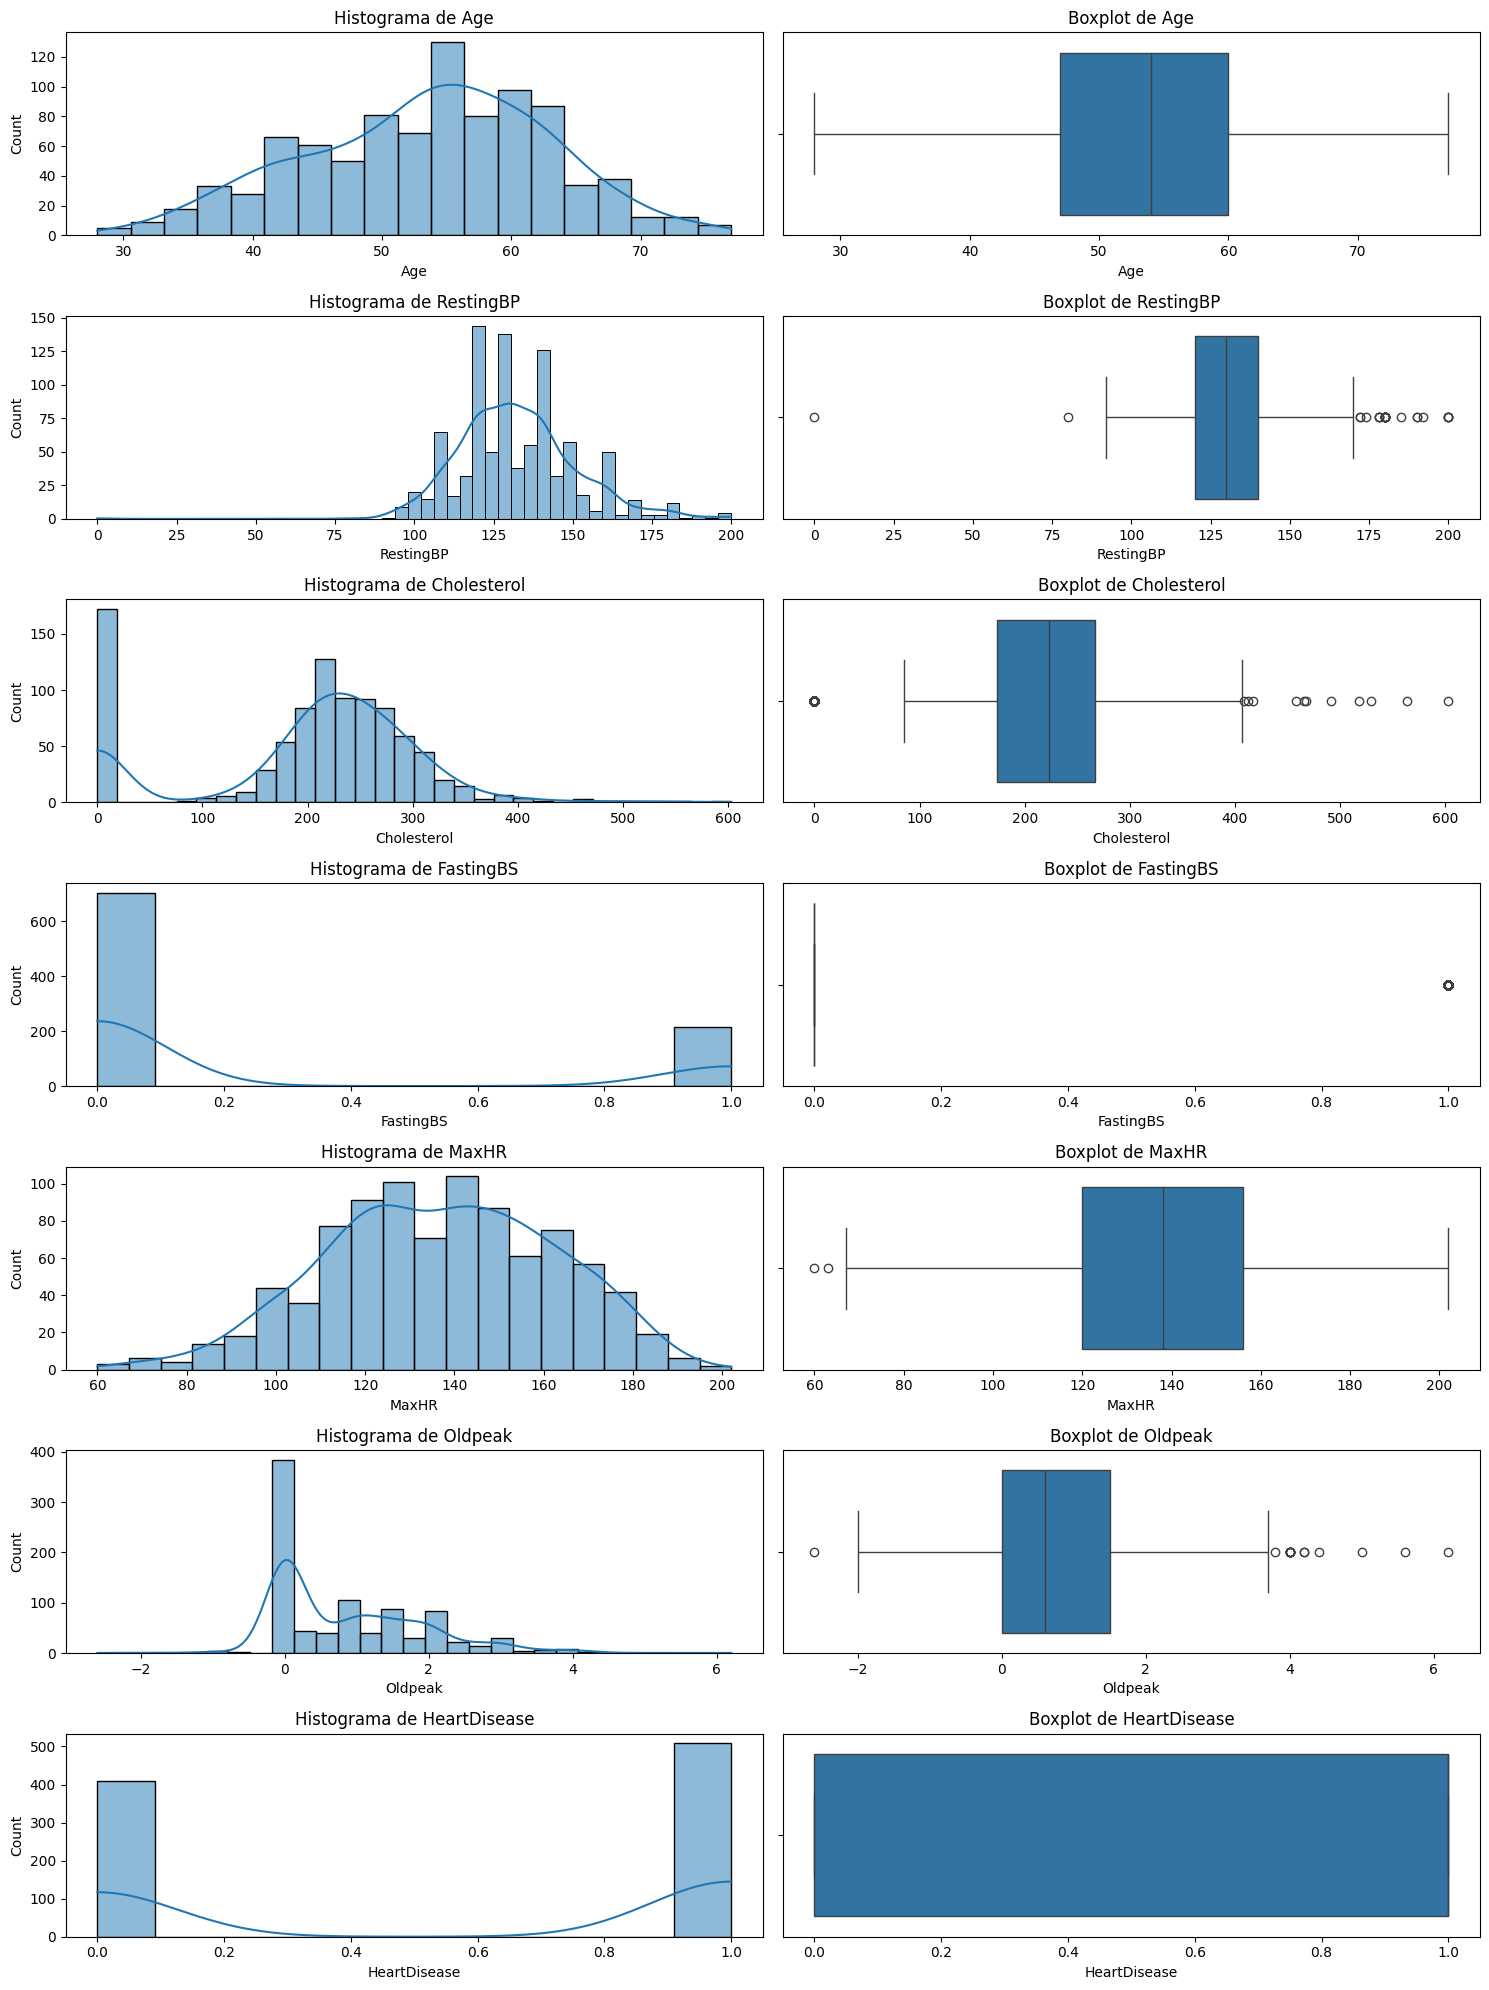

In [8]:
fig, axes = plt.subplots(7,2, figsize=(15,20))
axes = axes.flatten()


for i, col in enumerate(numericos.columns):
    # Histogramas
    sns.histplot(data=numericos, x=col, kde=True, ax=axes[i*2])
    axes[i*2].set_title(f"Histograma de {col}")
    #Boxplots
    sns.boxplot(data=numericos, x=col, ax=axes[i*2+1])
    axes[i*2+1].set_title(f"Boxplot de {col}")

fig.tight_layout()
plt.show()


| Variable | Valores fuera de rango | Descripción | Rango esperado |
|----------|------------------------|-------------|----------------|
| Age | No | Distribución aproximadamente normal, centrada alrededor de 50-55 años. Sin outliers evidentes. | 29-77 años |
| RestingBP | Sí | Presenta múltiples outliers en el extremo superior (>180 mmHg), indicando casos de presión arterial muy elevada. | 94-200 mm Hg |
| Cholesterol | Sí | Tiene un pico anómalo en 0 (probablemente datos faltantes codificados como 0) y varios outliers en el extremo superior (>400 mg/dL). | 126-564 mg/dL |
| FastingBS | Sí | Variable binaria (0 o 1) con distribución muy sesgada hacia 0. | 0: ≤120 mg/dL, 1: >120 mg/dL |
| MaxHR | No | Distribución aproximadamente normal, centrada entre 120-150 bpm. Sin outliers evidentes. | 60-202 latidos/min |
| Oldpeak | Sí | Altamente sesgada hacia la derecha con múltiples outliers en valores superiores (>4), indicando casos con depresión ST elevada. Adicionalmente muestra valores por debajo del rango de (0.0) | 0.0-6.2 |
| HeartDisease | No | Variable binaria (0 o 1) sin outliers. Distribución aproximadamente balanceada entre ambas categorías. | 0: Sin enfermedad, 1: Con enfermedad |

## Análisis variables categóricas

In [10]:
categoricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             918 non-null    object
 1   ChestPainType   918 non-null    object
 2   RestingECG      918 non-null    object
 3   ExerciseAngina  918 non-null    object
 4   ST_Slope        918 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB


In [14]:
2%2

0

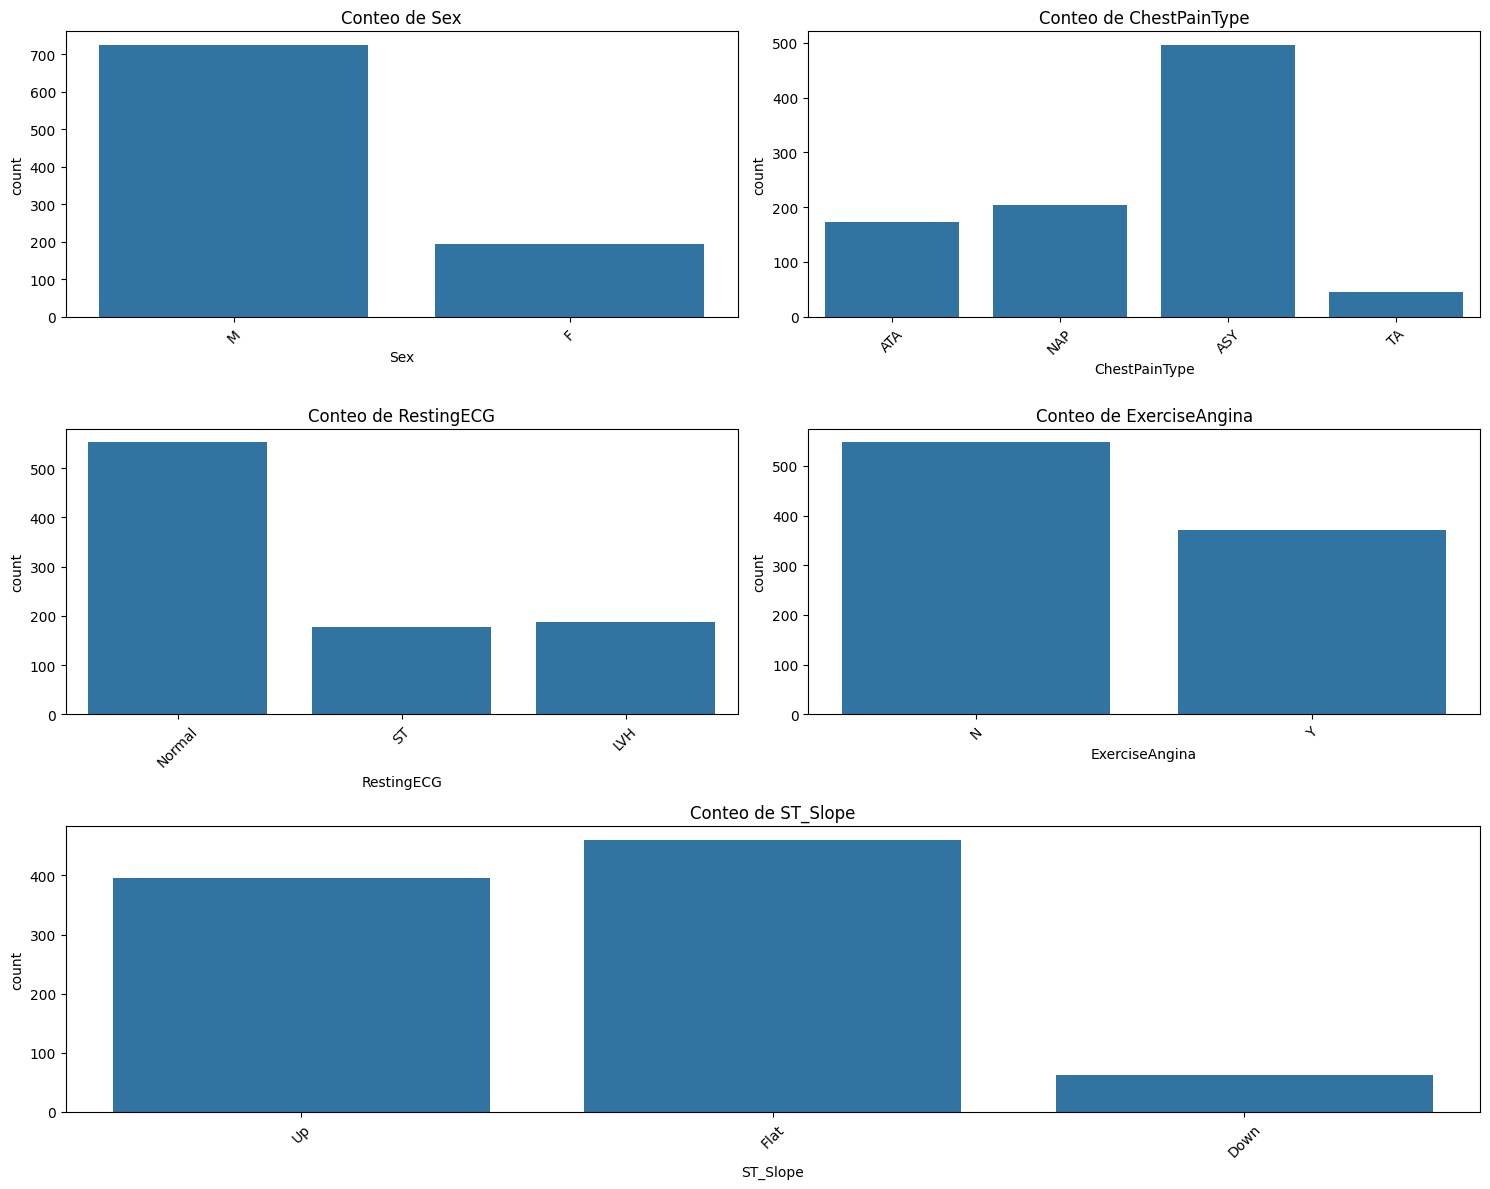

In [11]:
fig = plt.figure(figsize=(15, 12))

for i, col in enumerate(categoricos.columns):
    if i < 4:
        ax = plt.subplot2grid((3, 2), (i//2, i%2))
    else:
        ax = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    
    sns.countplot(data=categoricos, x=col, ax=ax)
    ax.set_title(f"Conteo de {col}")
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

| Variable | Descripción |
|----------|-------------|
| **Sex** | Distribución muy desbalanceada con predominancia de hombres (M): aproximadamente 780 casos vs 200 mujeres. Esto representa una proporción de ~80% hombres y ~20% mujeres, lo cual es importante considerar para el modelado ya que podría generar sesgo. |
| **ChestPainType** | Tiene 4 categorías (ATA, NAP, ASY, TA). La categoría ASY (Asintomático) es la más frecuente con ~500 casos, seguida por NAP y ATA (~200 cada una), y TA es la menos común (~50 casos). Esta distribución sugiere que muchos pacientes no presentan dolor torácico típico. |
| **RestingECG** | Tres categorías: Normal (predominante con ~550 casos), ST (~180 casos) y LVH (~180 casos). La mayoría de pacientes tienen un ECG en reposo normal, pero hay una proporción significativa con anomalías ST o hipertrofia ventricular izquierda. |
| **ExerciseAngina** | Variable binaria (N/Y) que indica si hay angina inducida por ejercicio. Distribución relativamente balanceada: ~580 casos sin angina (N) y ~380 casos con angina (Y). Aproximadamente 40% de los pacientes experimentan angina durante el ejercicio. |
| **ST_Slope** | Tres categorías: Flat (~480 casos, la más común), Up (~400 casos) y Down (~60 casos, muy poco frecuente). La pendiente del segmento ST durante el ejercicio es mayormente plana o ascendente, con pocos casos de pendiente descendente. |